<a href="https://colab.research.google.com/github/vvfpint0/AIStudyHub/blob/main/Bioinfo2526_Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0. Instalar Biopython**
https://biopython.org/


In [23]:
!pip install BioPython

import Bio



**1.   Construção de Dotplots**








In [9]:
# -----------------------------
# Função simples para gerar dotplot entre as 2 sequências recebidas como parâmetro
# O parâmetro window define o tamanho da janela deslizante
# -----------------------------

import matplotlib.pyplot as plt


def dotplot(seq1, seq2, window=1):
    """Cria um dotplot simples entre duas sequências."""
    x = []
    y = []

    for i in range(len(seq1) - window + 1):
        for j in range(len(seq2) - window + 1):
            if seq1[i:i+window] == seq2[j:j+window]:
                x.append(i)
                y.append(j)

    plt.figure(figsize=(6,6))
    plt.scatter(x, y, s=10, color="black")
    plt.title(f"Dotplot (janela={window})")
    plt.xlabel("Sequência 1")
    plt.ylabel("Sequência 2")
    plt.show()


**1.1. Dotplot entre 2 sequências de DNA**

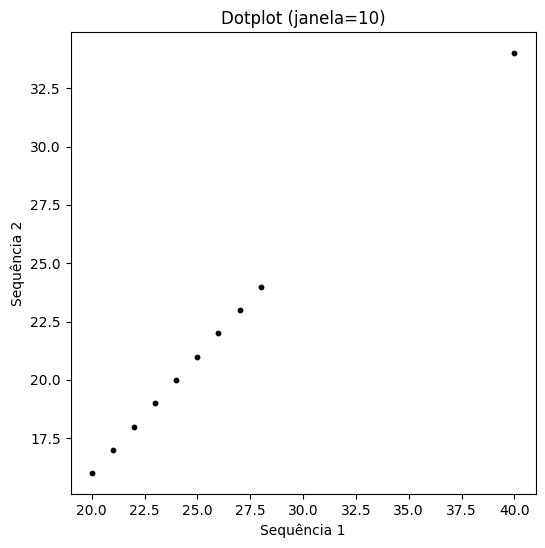

In [14]:
# Construção de um dotplot entre 2 sequências de DNA

from Bio.Seq import Seq

S1 = Seq('ggtagcttcagactgtaccgacgttattcacgctcccactgaacaattgg')
S2 = Seq('gctacccatactgtttacgttattcacgctcccagaacaattgg')

janela = 10

dotplot(S1, S2, janela)

**Questão:**

Altere o tamanho da janela (2, 3, 5, 10) e analise as diferenças no dotplot que é gerado. O que conclui da visualização dos gráficos?

Resposta : O aumento da janela leva a uma diminuição do ruído mas em contrapartida pode se perder informação importante se o aumento for excessivo.

**1.2. Dotplot entre sequências de aminoácidos**

In [15]:
# O gene KRT14 está relacionado com a produção de queratina (proteína essencial para a formação da pele)

# Pretende-se analisar a semelhança entre as sequências de aminoácidos que resultam da expressão deste gene em 3 espécies:
# Humanos (Homo Sapiens)
# Rato doméstico (Mus Musculus)
# Galo (Gallus Gallus)

# Obtenha a identificação das entradas Uniprot para esta proteína e estas 3 espécies:

# Homo Sapiens (Pesquisa: KRT14 Homo Sapiens)

UniProt_HS = "P02533"


# Mus Musculus (Pesquisa: KRT14 Mus Musculus)

UniProt_MM = "Q61781"


# Gallus Gallus (Pesquisa: KRT14 Gallus Gallus)

UniProt_GG = 	"Q6PVZ1"


In [16]:
# Aceder à Uniprot e obter as sequências

from Bio import ExPASy
from Bio import SeqIO

with ExPASy.get_sprot_raw(UniProt_HS) as handle:
    S_HS = SeqIO.read(handle, 'swiss')

with ExPASy.get_sprot_raw(UniProt_MM) as handle:
    S_MM = SeqIO.read(handle, 'swiss')

with ExPASy.get_sprot_raw(UniProt_GG) as handle:
    S_GG = SeqIO.read(handle, 'swiss')


In [17]:
print('Homo Sapiens: ', S_HS.seq)
print('Mus Musculus: ', S_MM.seq)
print('Gallus Gallus: ', S_GG.seq)

Homo Sapiens:  MTTCSRQFTSSSSMKGSCGIGGGIGGGSSRISSVLAGGSCRAPSTYGGGLSVSSSRFSSGGACGLGGGYGGGFSSSSSSFGSGFGGGYGGGLGAGLGGGFGGGFAGGDGLLVGSEKVTMQNLNDRLASYLDKVRALEEANADLEVKIRDWYQRQRPAEIKDYSPYFKTIEDLRNKILTATVDNANVLLQIDNARLAADDFRTKYETELNLRMSVEADINGLRRVLDELTLARADLEMQIESLKEELAYLKKNHEEEMNALRGQVGGDVNVEMDAAPGVDLSRILNEMRDQYEKMAEKNRKDAEEWFFTKTEELNREVATNSELVQSGKSEISELRRTMQNLEIELQSQLSMKASLENSLEETKGRYCMQLAQIQEMIGSVEEQLAQLRCEMEQQNQEYKILLDVKTRLEQEIATYRRLLEGEDAHLSSSQFSSGSQSSRDVTSSSRQIRTKVMDVHDGKVVSTHEQVLRTKN
Mus Musculus:  MATCSRQFTSSSSMKGSCGIGGGSSRMSSILAGGSCRAPSTYGGMSVTSSRFSSGGACGIGGGYGGSFSSSSFGGGLGSGFGGRFDGFGGGFGGGLGGGFGGGLGGGLGGGIGDGLLVGSEKVTMQNLNDRLATYLDKVRALEEANTELEVKIRDWYQRQRPTEIKDYSPYFKTIEDLKSKILAATVDNANVLLQIDNARLAADDFRTKFETEQSLRMSVEADINGLRRVLDELTLARADLEMQIESLKEELAYLKKNHEEEMASMRGQVGGDVNVEMDAAPGVDLSRILNEMRDQYEKMAEKNRKDAEEWFFSKTEELNREVATNSELVQSGKSEISELRRTMQNLEIELQSQLSMKASLENNLEETKGRYCMQLAQIQEMIGSVEEQLAQLRCEMEQQNQEYKILLDVKTRLEQEIATYRRLLEGEDAHLSSSQFSSSSQFSSGSQSSRDVTSTNRQIRTKVMDVHDGKVVSTHEQVLRTKN
Gallus Gallu

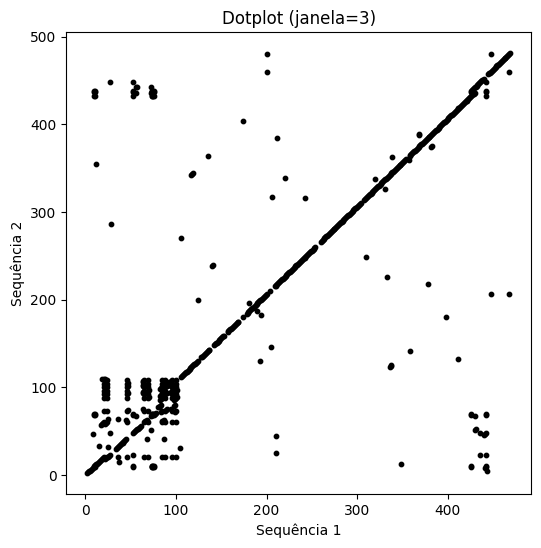

In [19]:
# Construa 3 dotplots
# 1: Homo Sapiens vs Mus Musculus

from Bio.Seq import Seq

S1 = S_HS.seq
S2 = S_MM.seq

janela = 3

dotplot(S1, S2, janela)



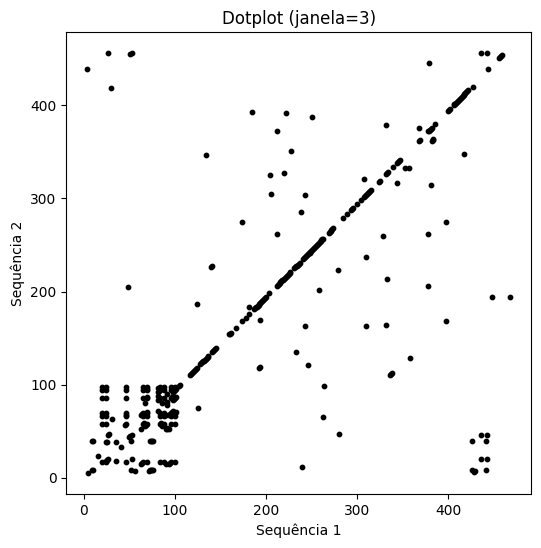

In [20]:
# 2: Homo Sapiens vs Gallus Gallus
from Bio.Seq import Seq

S3= S_HS.seq
S4 = S_GG.seq

janela = 3

dotplot(S3, S4, janela)

## COMPLETAR CÓDIGO ##



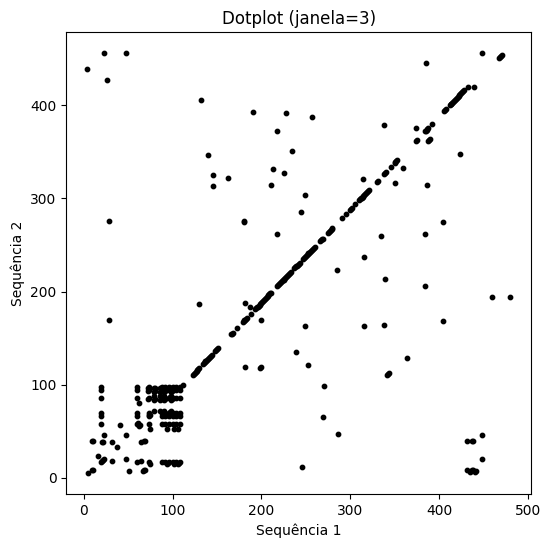

In [21]:
# 3: Mus Musculus vs Gallus Gallus

from Bio.Seq import Seq

S5 = S_MM.seq
S6 = S_GG.seq

janela = 3

dotplot(S5, S6, janela)

## COMPLETAR CÓDIGO ##


**1.3. Dotplot entre 2 cópia da mesma sequência**

Amino acid sequence:  MLENYRNLVFVGIAASKPDLITCLEQGKEPWNVKRHEMVAEPPVVCSYFARDLWPKQGKKNYFQKVILRRYKKCGCENLQLRKYCKSMDECKVHKECYNGLNQCLTTTQNKIFQCDKYVKVFHKFSNSNRHTIRHTGKKSFKCKECEKSFCMLSHLAQHKRIHSGEKPYKCKECGKAYNETSNLSTHKRIHTGKKPYKCEECGKAFNRLSHLTTHKIIHTGKKPYKCEECGKAFNQSANLTTHKRIHTGEKPYKCEECGRAFSQSSTLTAHKIIHAGEKPYKCEECGKAFSQSSTLTTHKIIHTGEKFYKCEECGKAFSQLSHLTTHKRIHSGEKPYKCEECGKAFKQSSTLTTHKRIHAGEKFYKCEVCSKAFSRFSHLTTHKRIHTGEKPYKCEECGKAFNLSSQLTTHKIIHTGEKPYKCEECGKAFNQSSTLSKHKVIHTGEKPYKYEECGKAFNQSSHLTTHKMIHTGEKPYKCEECGKAFNNSSILNRHKMIHTGEKLYKPESCNNACDNIAKISKYKRNCAGEK


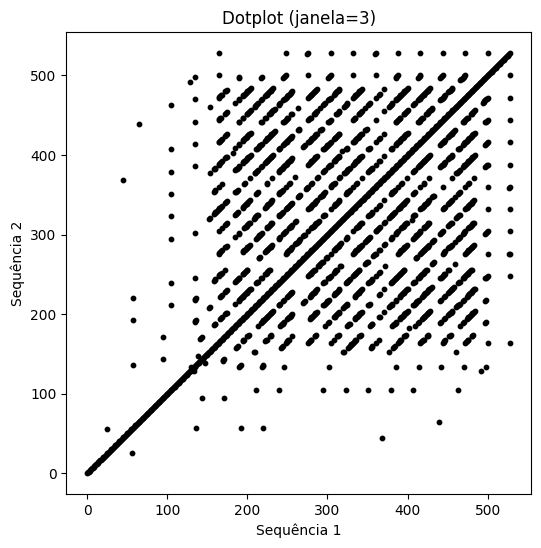

In [26]:
# A proteína Zinc Finger está associada aos processos de transcrição

# O identificador Uniprot para o Homo Sapiens é o seguinte

UniProt_ZF = 'Q9P255'
from Bio import ExPASy
from Bio import SeqIO

with ExPASy.get_sprot_raw(UniProt_ZF) as handle:
    S_ZF = SeqIO.read(handle, 'swiss')

# Get the amino acid sequence directly from the Swiss-Prot entry
AA1 = S_ZF.seq
AA2 = S_ZF.seq


print('Amino acid sequence: ', AA1)

# Obtain this amino acid sequence from Uniprot and perform a Dotplot between 2 copies of this same sequence


## COMPLETE THE CODE ##
janela = 3

dotplot(AA1, AA2, janela)

**Questão:**

Analise o dotplot. Como explica o que vê na imagem?

Resposta: As sequências são iguais. (Linha diagonal perfeita)

**2. Métricas para Avaliar Alinhamentos de Par**

In [30]:
# Função simples para colocar 2 strings do mesmo tamanho, adicionando o símbolo '-' no inicio ou no final da mais pequena

def completa(s1, s2, pos = 'end', simbolo='-'):

  max_len = max(len(s1), len(s2))
  if pos == 'start':
    s1 = s1.ljust(max_len, '-')
    s2 = s2.ljust(max_len, '-')
  elif pos == 'end':
    s1 = s1.rjust(max_len, '-')
    s2 = s2.rjust(max_len, '-')
  return s1, s2


In [31]:
# Função simples para inserir símbolos em algumas posições de uma string

def inserir_em_posicoes(s, posicoes, simbolo='-'):
    resultado = ''
    for i, c in enumerate(s, start=1):
        resultado += c
        if i in posicoes:
            resultado += simbolo
    return resultado

**2.1. Distância de Hamming**

**2.1.1. Considerar as sequências de aminoácidos do exemplo 1.2**

In [32]:
from scipy.spatial.distance import hamming


# Recuperar as sequências
S1 = S_HS.seq
S2 = S_MM.seq
S3 = S_GG.seq

# Normalizar tamanhos
S1, S2 = completa(str(S1), str(S2))
S1, S3 = completa(str(S1), str(S3))

# Calcular a distância de Hamming
print('Homo Sapiens / Mus Musculus: ', hamming(list(S1), list(S2)))
print('Homo Sapiens / Gallus Gallus: ',hamming(list(S1), list(S3)))
print('Mus Musculus / Gallus Gallus: ',hamming(list(S2), list(S3)))


Homo Sapiens / Mus Musculus:  0.7995867768595041
Homo Sapiens / Gallus Gallus:  0.8367768595041323
Mus Musculus / Gallus Gallus:  0.8842975206611571


**Questões:**

1. Analise os resultados. Estão de acordo com o que se verifica nos dotplots?

2. Altere a normalização do tamanho das sequências, para que elas passem a ficar encontadas à direita (parâmetro pos deve ser 'start'). Existem alterações nos resultados?

Resposta : A distância aumenta de acordo com o esperado , ou seja com o que se verifica nos dotplots. Sendo a distância Homo Sapiens / Mus Musculus:  "0.8471074380165289" , a menor e a distância Mus Musculus / Gallus Gallus:  "0.8739669421487604" a maior.

Resposta : Existem alterações ainda significativas em termos numéricos mas que não invertem os resultados verificados anteriormente em termos de comparação das sequências.

**2.1.2. Calcular distâncias a sequências de referência**

In [33]:
# Temos 2 sequências de aminoácidos de referência r1 e r2
# Temos uma sequência query q1

# Pretende-se saber qual das referências está mais próxima da query

r1 = 'MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR'
r2 = 'MVLSAADKNNVKGIFTKIAGHAEEYGAETLERMFTTYPPTKTYFPHFDLSHGSAQIKGHGKKVVAALIEAANHIDDIAGTLSKLSDLHAHKLRVDPVNFKLLGQCFLVVVAIHHPAALTPEVHASLDKFLCAVGTVLTAKYR'

q1 = 'MLTDAEKKEVTALWGKAAGHGEEYGAEALERLFQAFPTTKTYFSHFDLSHGSAQIKAHGKKVADALSTAAGHFDDMDSALSALSDLHAHKLRVDPVNFKLLAHCILVVLARHCPGEFTPSAHAAMDKFLSKVATVLTSKYR'

# A query é mais pequena do que as referências. Vamos adicionar um simbolo '-' ao final

q1A = inserir_em_posicoes(q1, range(len(q1), len(r1)), '-')


print('Distancia a r1: ', hamming(list(r1), list(q1A)))
print('Distancia a r2: ', hamming(list(r2), list(q1A)), '\n')

print(r1)
print(r2)
print(q1A)


Distancia a r1:  0.9084507042253521
Distancia a r2:  0.9225352112676056 

MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR
MVLSAADKNNVKGIFTKIAGHAEEYGAETLERMFTTYPPTKTYFPHFDLSHGSAQIKGHGKKVVAALIEAANHIDDIAGTLSKLSDLHAHKLRVDPVNFKLLGQCFLVVVAIHHPAALTPEVHASLDKFLCAVGTVLTAKYR
MLTDAEKKEVTALWGKAAGHGEEYGAEALERLFQAFPTTKTYFSHFDLSHGSAQIKAHGKKVADALSTAAGHFDDMDSALSALSDLHAHKLRVDPVNFKLLAHCILVVLARHCPGEFTPSAHAAMDKFLSKVATVLTSKYR-


In [34]:
# E se colocarmos o símbolo numa outra posição?

q1B = inserir_em_posicoes(q1, [1], '-')


print('Distancia a r1: ', hamming(list(r1), list(q1B)))
print('Distancia a r2: ', hamming(list(r2), list(q1B)), '\n')

print(r1)
print(r2)
print(q1B)

Distancia a r1:  0.2746478873239437
Distancia a r2:  0.34507042253521125 

MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR
MVLSAADKNNVKGIFTKIAGHAEEYGAETLERMFTTYPPTKTYFPHFDLSHGSAQIKGHGKKVVAALIEAANHIDDIAGTLSKLSDLHAHKLRVDPVNFKLLGQCFLVVVAIHHPAALTPEVHASLDKFLCAVGTVLTAKYR
M-LTDAEKKEVTALWGKAAGHGEEYGAEALERLFQAFPTTKTYFSHFDLSHGSAQIKAHGKKVADALSTAAGHFDDMDSALSALSDLHAHKLRVDPVNFKLLAHCILVVLARHCPGEFTPSAHAAMDKFLSKVATVLTSKYR


**Questão:**

O que conclui deste exercício?

Resposta : Que o simbolo colocado no fim é muito mais penalizador para a distância do que colocado após o primeiro aminoácido.

**2.2 Distância de Levenshtein**

In [37]:
!pip install levenshtein
# A distância de Levenshtein garante uma melhor contabilização das diferenças entre sequências
# Obtenha um módulo em Python que calcule esta distância
# https://rapidfuzz.github.io/Levenshtein/

# Repita os testes da secção anteriores e analise os resultados
from Levenshtein import distance
distance("lewenstein", "levenshtein")
print('Distancia a r1: ', distance(list(r1), list(q1B)))
print('Distancia a r2: ', distance(list(r2), list(q1B)), '\n')

print(r1)
print(r2)
print(q1B)

## COMPLETAR CÓDIGO ##



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 43.6 MB/s eta 0:00:00
Distancia a r1:  39
Distancia a r2:  49 

MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR
MVLSAADKNNVKGIFTKIAGHAEEYGAETLERMFTTYPPTKTYFPHFDLSHGSAQIKGHGKKVVAALIEAANHIDDIAGTLSKLSDLHAHKLRVDPVNFKLLGQCFLVVVAIHHPAALTPEVHASLDKFLCAVGTVLTAKYR
M-LTDAEKKEVTALWGKAAGHGEEYGAEALERLFQAFPTTKTYFSHFDLSHGSAQIKAHGKKVADALSTAAGHFDDMDSALSALSDLHAHKLRVDPVNFKLLAHCILVVLARHCPGEFTPSAHAAMDKFLSKVATVLTSKYR
